In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set()

We begin by reading the data and summarizing the variables.

In [2]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0902.csv'
df = pd.read_csv(path)
df.head()

,Species,Brain,Body,Gestation,Litter
0,Aardvark,9.6,2.20,31,5.0
1,Acouchis,9.9,0.78,98,1.2
2,African elephant,4480.0,2800.00,655,1.0
3,Agoutis,20.3,2.80,104,1.3
4,Axis deer,219.0,89.00,218,1.0


In [3]:
summary = df.describe()
summary

,Brain,Body,Gestation,Litter
count,96.000000,96.000000,96.000000,96.000000
mean,218.976979,108.327750,151.260417,2.310417
std,506.968011,329.411403,108.066086,1.747026
min,0.450000,0.017000,16.000000,1.000000
25%,12.600000,2.075000,63.000000,1.000000
50%,74.000000,8.900000,133.500000,1.200000
75%,260.000000,94.750000,226.250000,3.200000
max,4480.000000,2800.000000,655.000000,8.000000


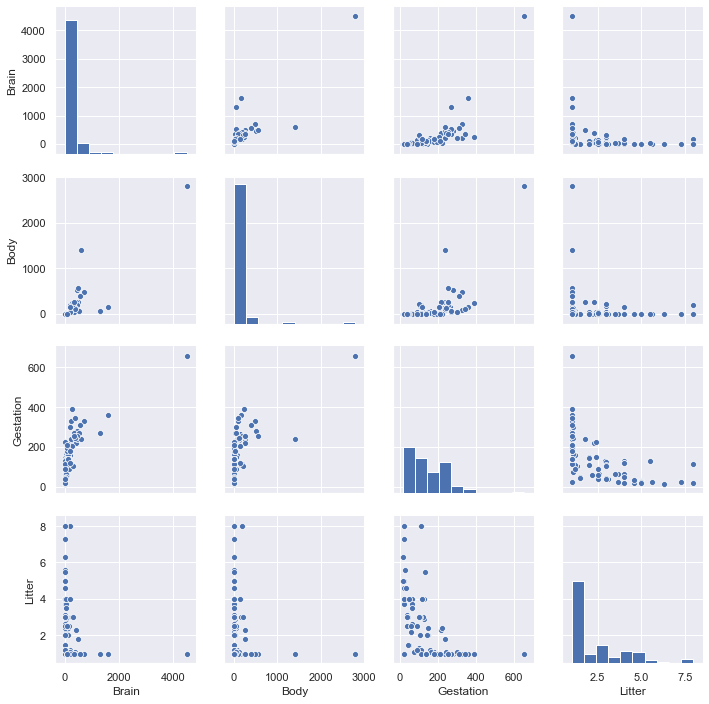

In [6]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)

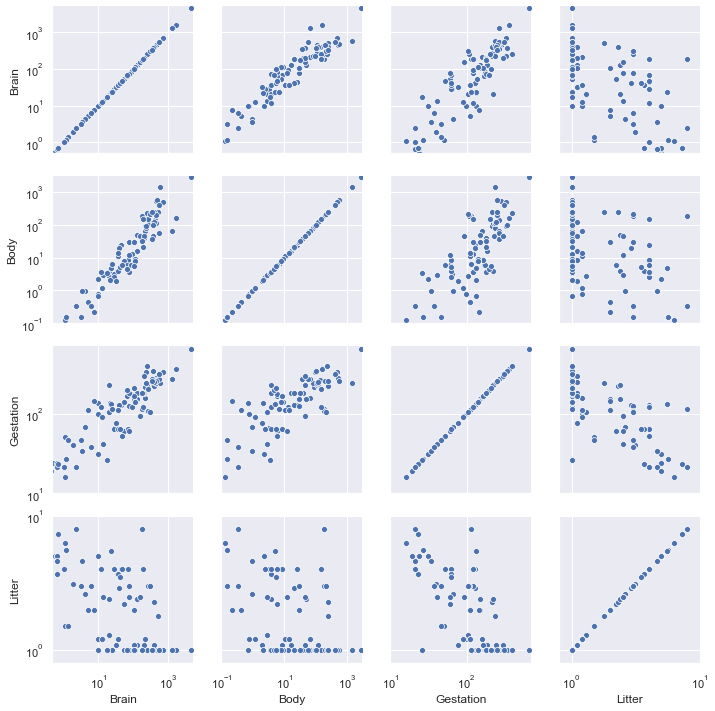

In [16]:
xylim_map = {0: [0.5, 5000], 1: [0.1, 3000], 2: [10, 700], 3: [0.8, 10]}
g = sns.PairGrid(df)
g.map(sns.scatterplot)
for ridx, row in enumerate(g.axes):
    ymin, ymax = xylim_map[ridx]
    for cidx, ax in enumerate(row):
        xmin, xmax = xylim_map[cidx]
        ax.set(xscale='log', yscale='log')
        ax.set_ylim(bottom=ymin, top=ymax)
        ax.set_xlim(left=xmin, right=xmax)

In [20]:
model = smf.ols('log(Brain) ~ log(Body) + log(Gestation) + log(Litter)', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Brain)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     631.6
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           3.14e-61
Time:                        12:51:54   Log-Likelihood:                -62.659
No. Observations:                  96   AIC:                             133.3
Df Residuals:                      92   BIC:                             143.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8548      0.662      1.